In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
repo='c:\\TES_project\\fpga_ise\\'
project='teslib'
testbench='measurement_unit_TB'
datafile='traces'
path=repo+project+'\\PlanAhead\\'+project+'.sim\\'+testbench+'\\'

In [3]:
dt = np.dtype([('input', np.int32),('raw',np.int32),('filtered',np.int32),('slope',np.int32)])

In [11]:
traces=np.fromfile(path+'traces',dt)
trigger=np.fromfile(path+'triggers',np.int32)
settings=np.fromfile(path+'settings',np.int32)
cfd_low=np.fromfile(path+'cfdlow',np.int32)
cfd_high=np.fromfile(path+'cfdhigh',np.int32)
peaks=np.fromfile(path+'peaks',np.int32)
peaks.shape=(-1,2)
peak_starts=np.fromfile(path+'peak_starts',np.int32)

<IPython.core.display.Javascript object>


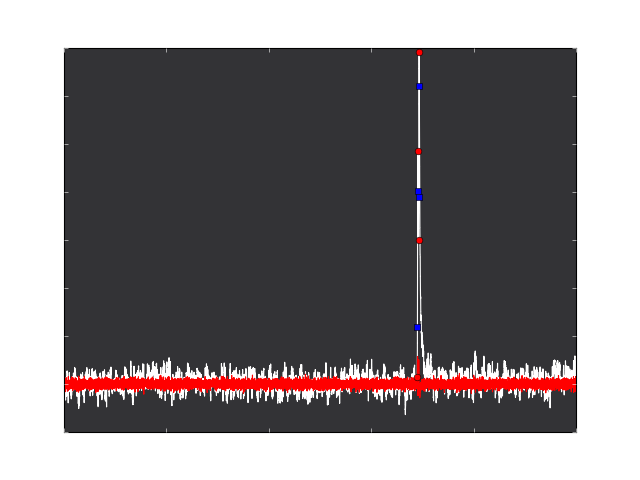

In [12]:
%matplotlib notebook
x=np.arange(len(traces['filtered']))
fig=plt.figure()
#fig.patch.set_facecolor('black')
ax=fig.add_axes([0.1,0.1,0.8,0.8])
#ax.set_axis_bgcolor=(0.1,0.1,0.1)
ax.patch.set_facecolor((0.2,0.2,0.21))
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
#p=plt.step(x,traces['raw'],'k')
ax.step(x,traces['filtered']/2,'w')
ax.step(x,traces['slope']/8,'r')
ax.plot(trigger,traces['filtered'][trigger+1]/2,'kx')
ax.plot(peaks[:,0],traces['filtered'][peaks[:,0]+1]/2,'ro')
ax.plot(peak_starts,traces['filtered'][peak_starts+1]/2,'ro')
ax.plot(cfd_high,traces['filtered'][cfd_high+1]/2,'bs')
ax.plot(cfd_low,traces['filtered'][cfd_low+1]/2,'bs')

In [7]:
peaks[:,0]

array([69131, 69353])

In [ ]:
from bokeh.charts import Step
from bokeh.plotting import figure, show, output_notebook

f=traces['filtered']
r=traces['raw']
x=np.arange(len(f))

p=figure(plot_width=800,plot_height=600,webgl=True)
#p.line(x,r,alpha=.3,color="black")
p.line(x,f,color="red",line_width=1)
p.cross(trigger,f[trigger],size=20,color="black")
p.circle(cfd_low,f[cfd_low],size=10,color="red",alpha=.3)
p.circle(cfd_high,f[cfd_high],size=10,color="red",alpha=.3)
p.circle(peak_starts,f[peak_starts],size=10,color="navy",alpha=.3)
p.circle(peaks[:,0],f[peaks[:,0]],size=10,color="navy",alpha=.3)

# build a dataset where multiple columns measure the same thing
#data = dict(clk=np.arange(len(f)),filtered=traces['filtered'])-

# create a line chart where each column of measures receives a unique color and dash style
#line = Step(data,x='clk',y=title="measurement_unit Testbench)", ylabel='clk')

output_notebook()

show(p)

In [6]:
peak_dt=np.dtype([('time',np.uint16),('flags',np.uint16),('minima',np.uint16),('height',np.uint16)])

In [60]:
area_dt=np.dtype([('time',np.uint16),('flags',np.uint16),('area',np.uint32)])

In [59]:
pulse_peak_dt=np.dtype([('trigger',np.uint16),('rise',np.uint16),('minima',np.uint16),('height',np.uint16)])
pulse_header_dt=np.dtype([('time',np.uint16),('flags',np.uint16),('res1',np.uint16),('size',np.uint16),
                    ('length',np.uint16),('res2',np.uint16),('area',np.int32)])

In [30]:
pulse2_dt=np.dtype([('time',np.uint16),('flags',np.uint16),('res1',np.uint16),('size',np.uint16),
                    ('length',np.uint16),('res2',np.uint16),('area',np.int32),
                    ('trigger0',np.uint16),('rise0',np.uint16),('minima0',np.uint16),('height0',np.uint16),
                    ('trigger1',np.uint16),('rise1',np.uint16),('minima1',np.uint16),('height1',np.uint16)])

In [64]:
pulse2_subarray_dt=np.dtype([('header',pulse_header_dt,('peaks', (pulse_peak_dt,(1,2)) ))])

ValueError: invalid shape in fixed-type tuple.

In [15]:
eventstream=np.fromfile(path+'eventstream',peak_dt)

In [61]:
eventstream=np.fromfile(path+'eventstream',area_dt)

In [65]:
eventstream=np.fromfile(path+'eventstream',pulse2_dt)

In [66]:
eventstream

array([(0, 10016, 0, 5, 0, 0, 1027013, 32, 101, 57, 1942, 33, 80, 1197, 2768)], 
      dtype=[('time', '<u2'), ('flags', '<u2'), ('res1', '<u2'), ('size', '<u2'), ('length', '<u2'), ('res2', '<u2'), ('area', '<i4'), ('trigger0', '<u2'), ('rise0', '<u2'), ('minima0', '<u2'), ('height0', '<u2'), ('trigger1', '<u2'), ('rise1', '<u2'), ('minima1', '<u2'), ('height1', '<u2')])

In [41]:
flags=eventstream['flags']
print(np.binary_repr(flags[0],16))

0010011100100000


In [67]:
print("flags:{:016b}\nsize:{}\nlength:{}\narea:{}\ntrigger:{} rise:{} minima:{} height:{}\ntrigger:{} rise:{} minima:{} height:{}\n"  
      .format(eventstream['flags'][0],eventstream['size'][0],eventstream['length'][0],eventstream['area'][0],
        eventstream['trigger0'][0],eventstream['rise0'][0],eventstream['minima0'][0],eventstream['height0'][0],
        eventstream['trigger1'][0],eventstream['rise1'][0],eventstream['minima1'][0],eventstream['height1'][0]))

flags:0010011100100000
size:5
length:0
area:1027013
trigger:32 rise:101 minima:57 height:1942
trigger:33 rise:80 minima:1197 height:2768



In [10]:
print(np.binary_repr(flags[1],16))

0000011100011000


In [28]:
rel_to_min=np.right_shift(np.bitwise_and(flags,0x8000),15).astype(np.bool)
channel=np.right_shift(np.bitwise_and(flags,0x0F00),8).astype(np.uint8)
threshold_rel2min=np.right_shift(np.bitwise_and(flags,0x4000),14).astype(np.bool)
peak_count=np.right_shift(np.bitwise_and(flags,0x00F0),4).astype(np.uint8)
tick=np.bitwise_and(flags,0x0001).astype(bool)
area=np.right_shift(np.bitwise_and(flags,0x0002),1).astype(np.bool)
trace=np.right_shift(np.bitwise_and(flags,0x0004),2).astype(np.bool)
fixed=np.right_shift(np.bitwise_and(flags,0x0008),3).astype(np.bool)
event_type=np.right_shift(np.bitwise_and(flags,0x3000),12).astype(np.uint8)

In [77]:
flags

array([   0, 1808], dtype=uint16)

In [47]:
eventstream

array([(0, 1800, 82, 1554), (0, 1800, 78, 1620), (0, 1800, 81, 1624),
       (0, 1800, 69, 1513), (0, 1800, 94, 1825), (0, 1800, 80, 1511),
       (0, 1800, 93, 1640), (0, 1800, 101, 1884), (0, 1816, 80, 1571)], 
      dtype=[('time', '<u2'), ('flags', '<u2'), ('rise_time', '<u2'), ('height', '<u2')])